In [1]:

#####################################       Sentiment analysis on entire routine          ######################################

# import sys
# !{sys.executable} -m pip install textblob

## Importing libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import math


## Loading cleaned data in data-frame form from a pickle file
data = pd.read_pickle('data_in_df.pkl')

## Calculating the polarity and subjectiveity of every routine
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['Transcript'].apply(pol)
data['subjectivity'] = data['Transcript'].apply(sub)


## Indicator to see if things are working as expected
data

,Transcript,Full name,polarity,subjectivity
Adam Sandler,"[man] Okay, ready, and… Take your own cue, Ada...",Adam Sandler,0.000735,0.548044
Ali Wong,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.073176,0.488676
Aziz Ansari,♪ Sometimes I feel so happy ♪\n♪ Sometimes I f...,Aziz Ansari,0.091005,0.492349
Daniel Sloss,A man offered us a billion dollars. – Bolt the...,Daniel Sloss,0.030089,0.536920
Gabriel “Fluffy” Iglesias,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,Gabriel “Fluffy” Iglesias,0.131928,0.480376
Hannah Gadsby,[“Bobby Reid” plays]\n♪ There’s blood in the w...,Hannah Gadsby,0.059695,0.517062
Hasan Minhaj,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
John Mulaney,[organ music playing] Welcome to Radio City Mu...,John Mulaney,0.082258,0.477899
Mike Birbiglia,♪ Hey! I wanna get better ♪\n♪ I didn’t know I...,Mike Birbiglia,0.110151,0.499697
Sebastian Maniscalco,[instrumental music plays] ♪ All right ♪ [scre...,Sebastian Maniscalco,0.055561,0.476368


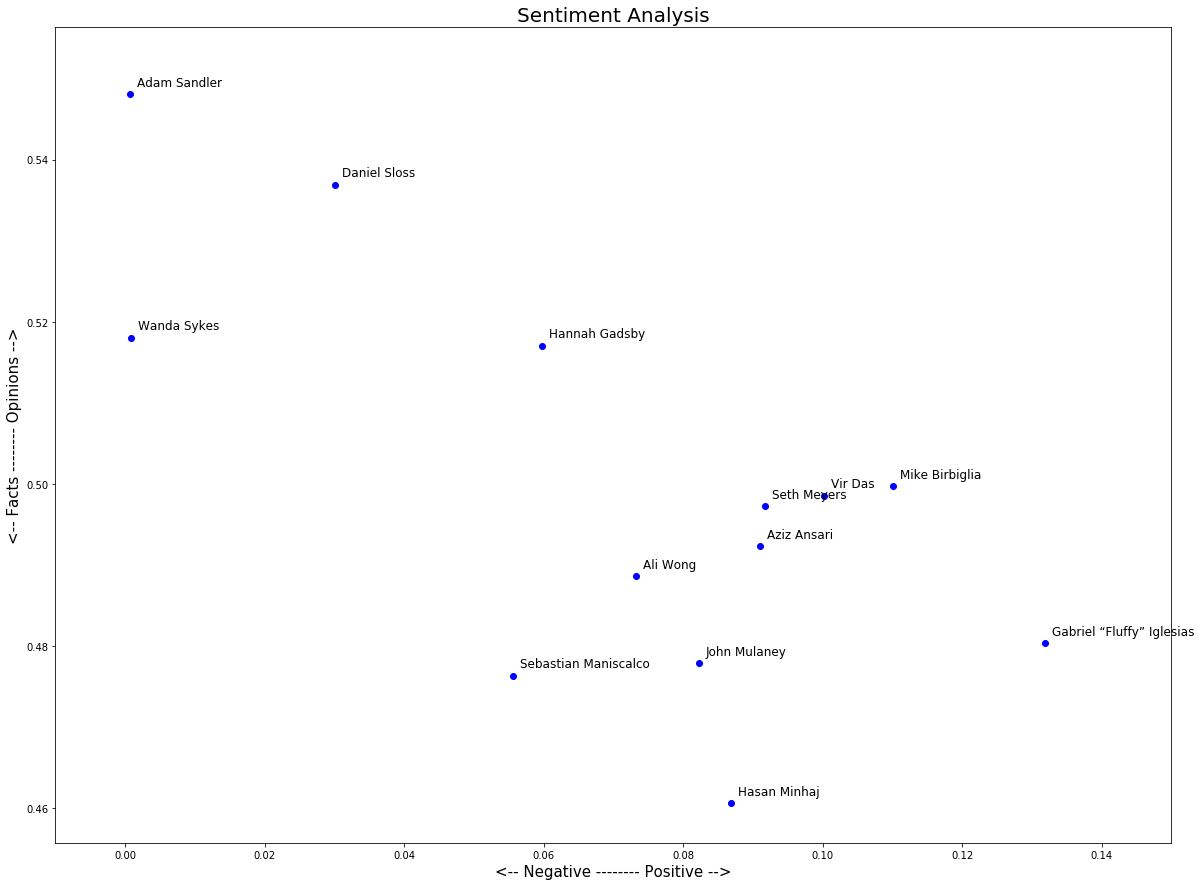

In [4]:

###########################            Visualizing Sentiment analysis on entire routine              ###########################

## Resetting output dimensions
plt.rcParams['figure.figsize'] = [20, 15]


## Formatting the graph parameters
for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['Full name'][index], fontsize=12)
    plt.xlim(-.01, .15) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

## Displaying the graph
plt.show()

In [7]:

#####################################       Sentiment analysis in intervals          ######################################

## Function for splitting routine into 15 equal parts
def split_text(text, n=15):
    
    # Calculating length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pulling out equally sized pieces of text and putting it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

## Splitting routine into 15 parts
list_pieces = []
for t in data.Transcript:
    split = split_text(t)
    list_pieces.append(split)
    

## Calculating the polarity for each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

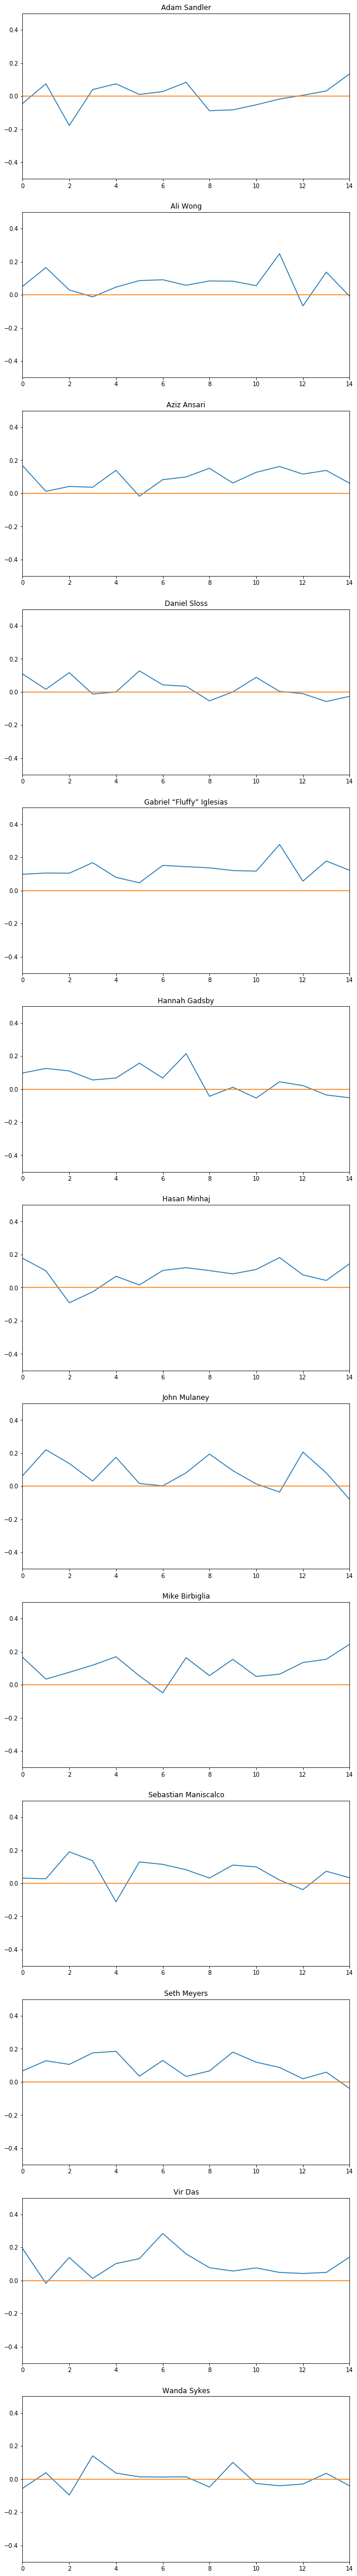

In [27]:

###########################            Visualizing Sentiment analysis in intervals              ###########################

## Resetting output dimensions
plt.rcParams['figure.figsize'] = [10, 80]

## Formatting the graph parameters
for index, comedian in enumerate(data.index):    
    plt.subplot(13, 1, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(data['Full name'][index])
    plt.ylim(ymin=-.5, ymax=.5)
    plt.xlim(xmin=0, xmax=14)
    
## Displaying the graph
plt.show()